important libraries import

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
pd.options.display.float_format = '{:.2f}'.format
import warnings
warnings.filterwarnings('ignore')

#### 1. Data loading and inspection

In [2]:
heart_df =pd.read_csv(r"C:\Users\user\Desktop\Baacumen\machine learning\project\Heart failure\heart.csv")

In [3]:
heart_df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.00,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.00,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.00,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.50,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.00,Up,0


In [4]:
heart_df.dtypes

Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object

##### Display the shape of the data set

In [5]:
# checking the shape of the dataset (rows, columns)
print("Shape of the dataset:", heart_df.shape)

Shape of the dataset: (918, 12)


##### Display the number of unique values in each column

In [6]:
print("\n Number of Unique Values in Each Column:\n", heart_df.nunique())


 Number of Unique Values in Each Column:
 Age                50
Sex                 2
ChestPainType       4
RestingBP          67
Cholesterol       222
FastingBS           2
RestingECG          3
MaxHR             119
ExerciseAngina      2
Oldpeak            53
ST_Slope            3
HeartDisease        2
dtype: int64


##### checking missing value

In [7]:
print("\n Null Values in Each Column:\n", heart_df.isnull().sum())


 Null Values in Each Column:
 Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64


### 2. Data Cleaning & Preprocessing

#####

##### creating catagorical features

In [34]:
heart_df["FastingBS"] = heart_df["FastingBS"].astype(object)

In [36]:
categorical_features = heart_df.select_dtypes(include='object')
categorical_features.head()

,Sex,ChestPainType,FastingBS,RestingECG,ExerciseAngina,ST_Slope
0,M,ATA,0,Normal,N,Up
1,F,NAP,0,Normal,N,Flat
2,M,ATA,0,ST,N,Up
3,F,ASY,0,Normal,Y,Flat
4,M,NAP,0,Normal,N,Up


##### Apply one hot encoder on classfication features

In [37]:
from sklearn.preprocessing import OneHotEncoder,StandardScaler

ohc = OneHotEncoder()
ohc.fit(categorical_features)

OneHotEncoder()

In [38]:
x_categorical = ohc.transform(categorical_features)
x_categorical.shape

(918, 16)

##### creating numerical features

In [39]:
numerical_features = heart_df.select_dtypes(exclude='object').drop(columns="HeartDisease")
numerical_features.head()

,Age,RestingBP,Cholesterol,MaxHR,Oldpeak
0,40,140,289,172,0.00
1,49,160,180,156,1.00
2,37,130,283,98,0.00
3,48,138,214,108,1.50
4,54,150,195,122,0.00


##### scale numerical features

In [40]:
scaler = StandardScaler()
scaler.fit(numerical_features)

StandardScaler()

In [41]:
x_numerical = scaler.transform(numerical_features)

In [42]:
x = pd.concat([pd.DataFrame(x_categorical.toarray()),pd.DataFrame(x_numerical)],axis=1,ignore_index=True)
x.head()

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,0.00,1.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,1.00,...,1.00,0.00,0.00,0.00,1.00,-1.43,0.41,0.83,1.38,-0.83
1,1.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00,0.00,1.00,...,1.00,0.00,0.00,1.00,0.00,-0.48,1.49,-0.17,0.75,0.11
2,0.00,1.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,...,1.00,0.00,0.00,0.00,1.00,-1.75,-0.13,0.77,-1.53,-0.83
3,1.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,...,0.00,1.00,0.00,1.00,0.00,-0.58,0.30,0.14,-1.13,0.57
4,0.00,1.00,0.00,0.00,1.00,0.00,1.00,0.00,0.00,1.00,...,1.00,0.00,0.00,0.00,1.00,0.05,0.95,-0.03,-0.58,-0.83


##### check class imbalance

In [17]:
heart_df["HeartDisease"].value_counts(normalize=True)*100

HeartDisease
1   55.34
0   44.66
Name: proportion, dtype: float64

##### Split the data

In [18]:
y = heart_df["HeartDisease"]

In [19]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,shuffle=True, random_state=77)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((734, 20), (184, 20), (734,), (184,))

## 3. EDA

##### univariate plot

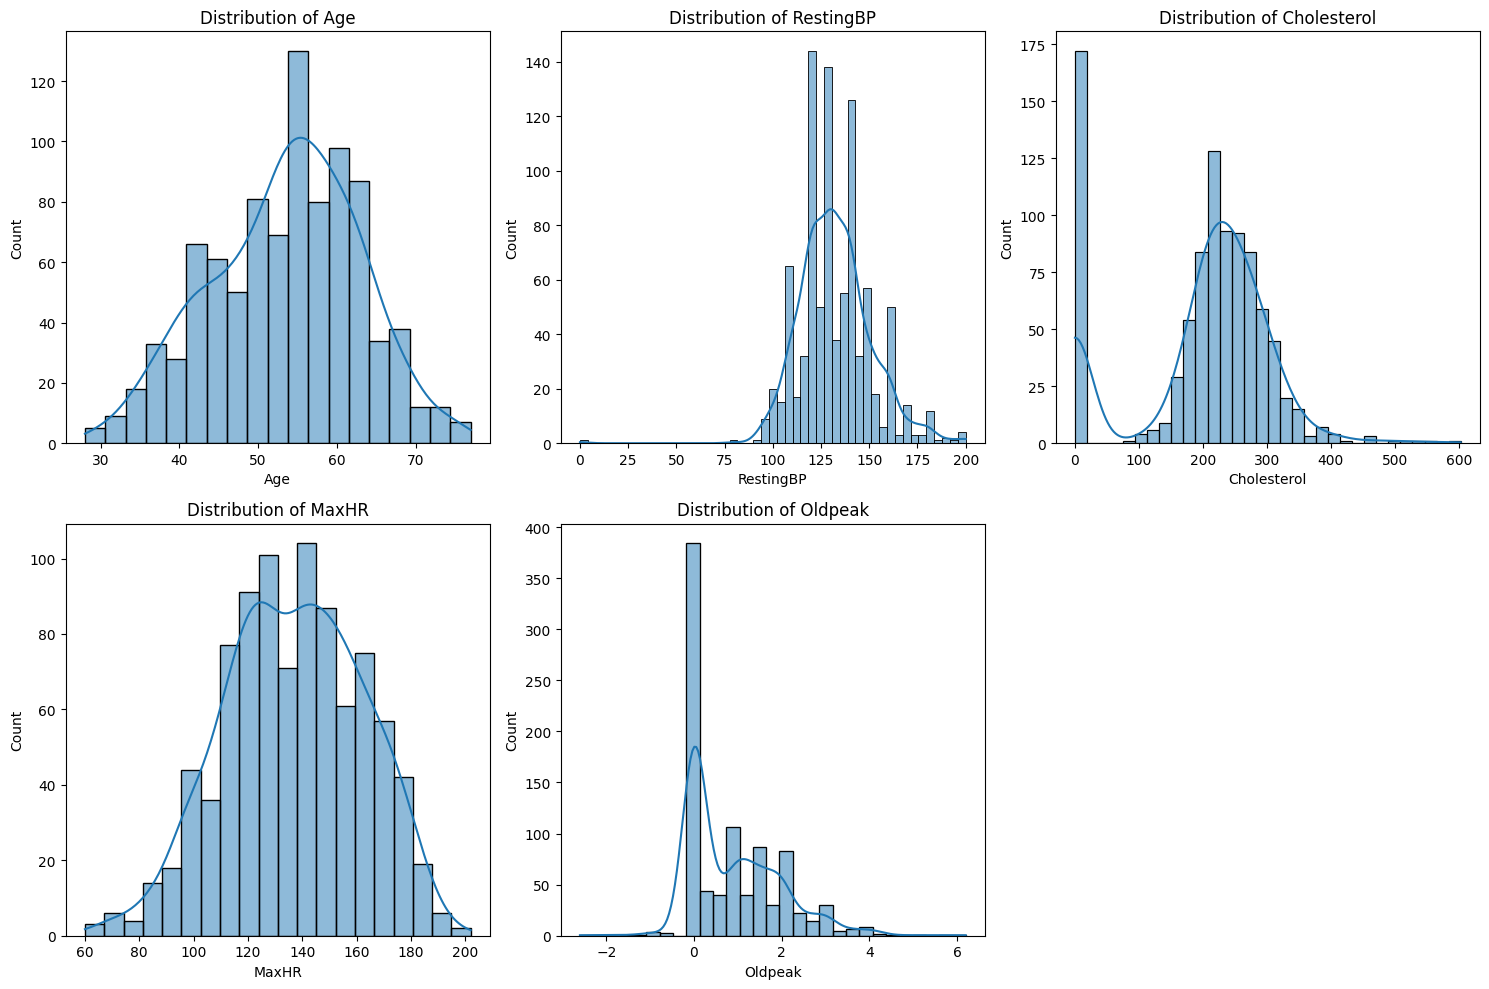

In [43]:
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_features):
    plt.subplot(2, 3, i + 1)
    sns.histplot(numerical_features[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.tight_layout()
plt.show()

In [ ]:
plt.figure(figsize=(15, 8))
for i, col in enumerate(list(numerical.columns)[0:]):
    plt.subplot(2, 3, i + 1)
    sns.boxplot(data=numerical, x=col)
plt.tight_layout()
plt.show()

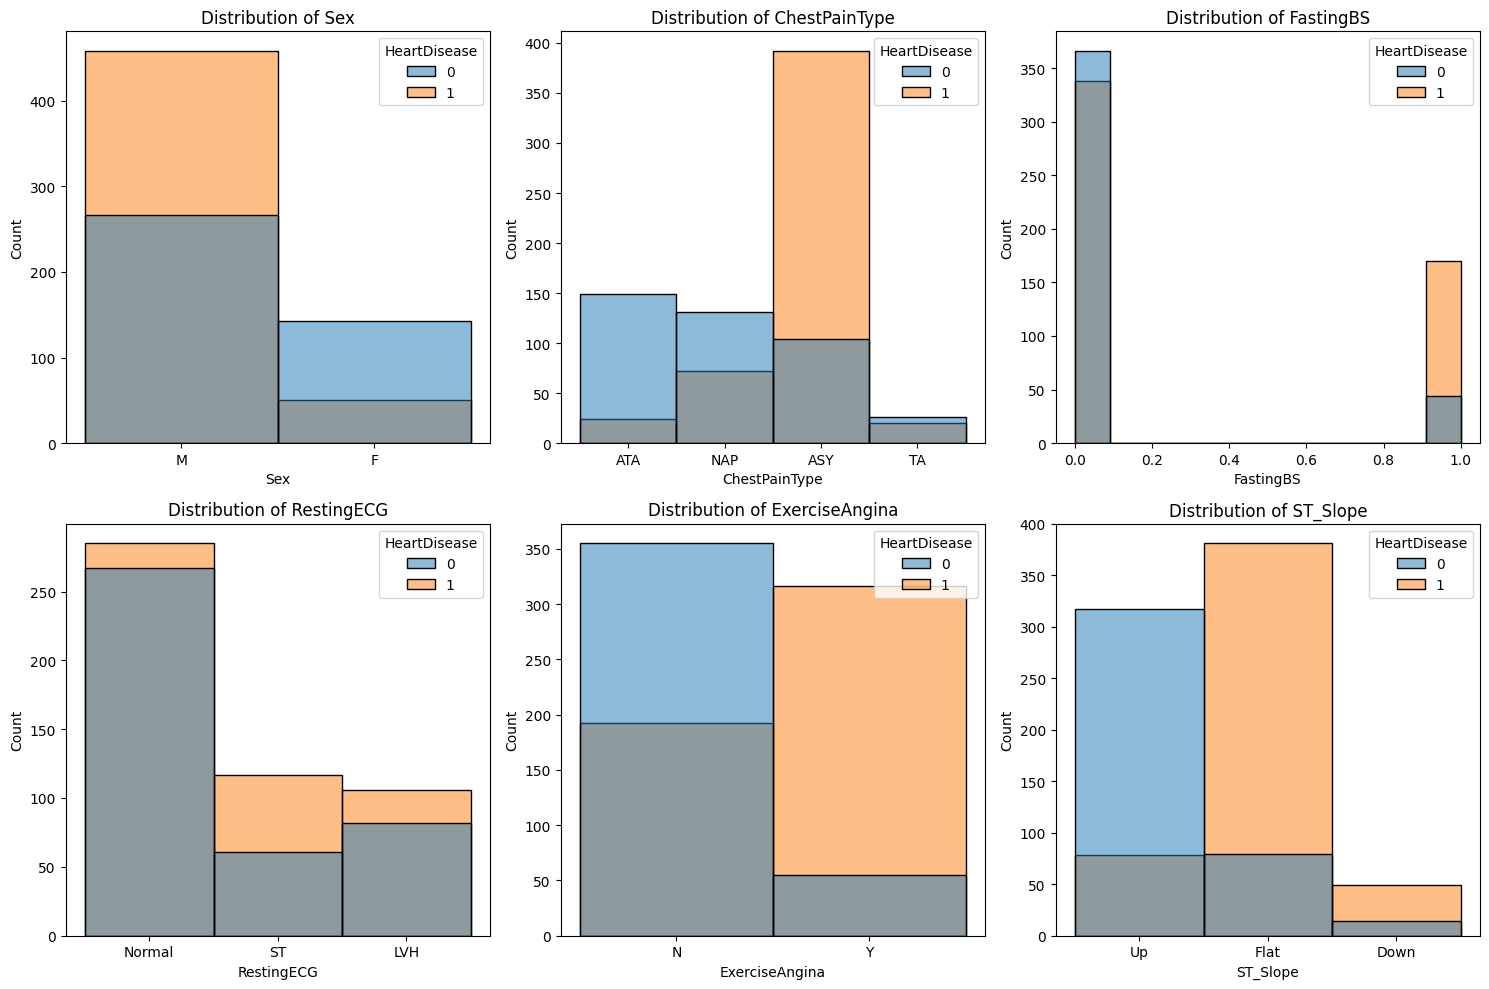

In [55]:
plt.figure(figsize=(15, 10))
for i, col in enumerate(list(categorical_features.columns)[0:]):
    plt.subplot(2, 3, i + 1)
    sns.histplot(data=heart_df, x=col, hue='HeartDisease')
    plt.title(f'Distribution of {col}')
    plt.tight_layout()
plt.show()

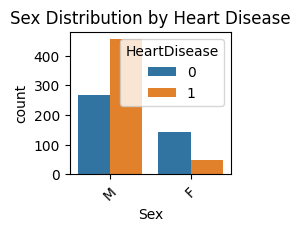

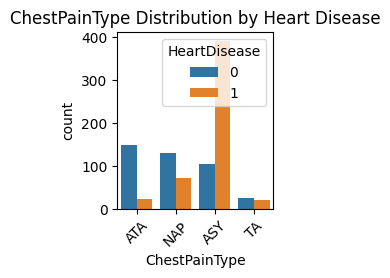

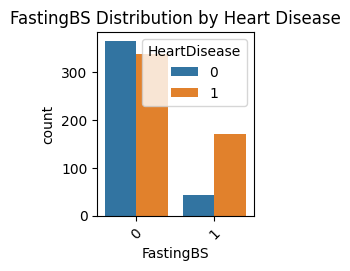

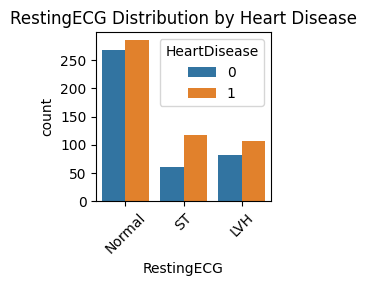

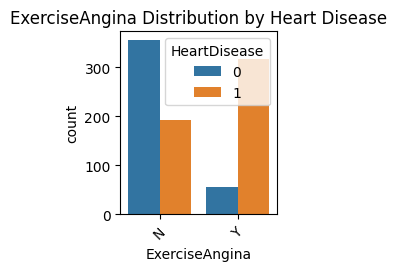

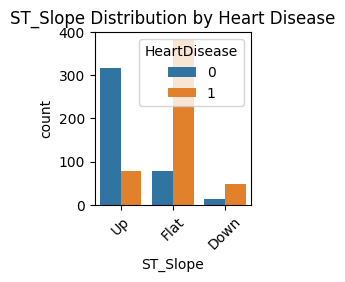

In [51]:
plt.figure(figsize=(6, 4))
for i, col in enumerate(categorical_features):
    plt.subplot(2, 3, i + 1)
    sns.countplot(data = heart_df, x= col, hue='HeartDisease')
    plt.title(f'{col} Distribution by Heart Disease')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()